In [178]:
import numpy as np
import math
import matplotlib.pyplot as plt
import pandas as pd


In [183]:
print('lens\' focal length is: ',f)
print('lens\' radius is: ',lens_pitch_x)
np.arctan(lens_pitch_x/2/f)/np.pi*180

lens' focal length is:  10540.56260267936
lens' radius is:  150000.0


82.0

In [187]:
p7(0)

312.9757588248616

In [198]:
# NA=1.45
# n_oil=1.5223
# # n_silica=1.47
# thita=np.arcsin(NA/n_oil) #rad
# print("the maximum angle of incident light is: ",thita/np.pi*180," degree")

In [199]:
# lens array parameters
X_lens_num=1
Y_lens_num=1

#microlens parameters

#working wavelength
wl = 976.5

thita=82/180*np.pi #rad
r_lens= 150e3/2 # nm 

#focal length
f=r_lens/np.tan(thita)

# lens_pitch_x/a_lattice should be a integer

a_lattice = 451 
H_post = 592.2

lens_pitch_x = r_lens*2 # nm 
# lens_pitch_x = 100*a_lattice #150e3

# lens_pitch_y = lens_pitch_x
lens_pitch_y = 1*a_lattice

order = 1

# calculation parameters

# lens_pitch_x in lattice number 
naxlp=0
naylp=0
x_lens_edge=0
y_lens_edge=0

string_result=''
print(f)

10540.56260267936


Text(0.5, 1.0, 'light path difference')

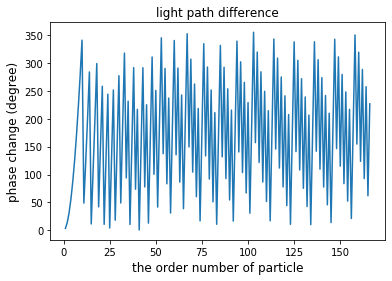

In [200]:
alpha=a_lattice
N= np.floor(r_lens/alpha)
x_order=np.arange(1,N+1) # nm  0-0.1mm
x=alpha*x_order
d_p=np.sqrt(f**2+x**2)-f

# light path from x point at lens to focal point, has phi_x additive phase change than that of center point
phi_x=np.remainder(d_p, wl)/wl*360

plt.plot(x_order,phi_x)
plt.xlabel('the order number of particle',fontsize='large')
plt.ylabel('phase change (degree)',fontsize='large')
plt.title('light path difference')

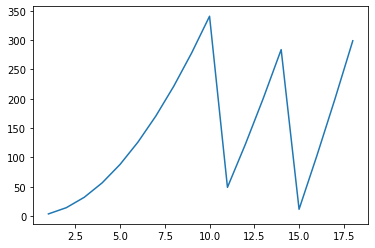

In [201]:
number_sep=10
L=len(x_order)
ktest=np.floor(np.linspace(0,L,number_sep)).astype(int)

# for i in range(0,number_sep-1):
for i in range(0,1):

    plt.figure()
    plt.plot(x_order[ktest[i]:ktest[i+1]],phi_x[ktest[i]:ktest[i+1]])

Text(0.5, 1.0, 'phase profile of focal lens')

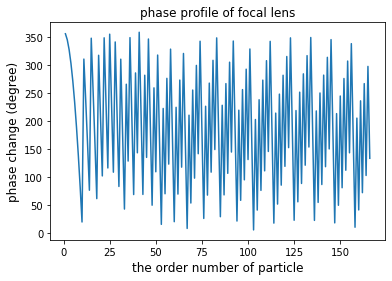

In [202]:
# method 1 add additive 
phi_required_x = 360-phi_x
D_required_x=p7(phi_required_x)
plt.plot(x_order,phi_required_x)
plt.xlabel('the order number of particle',fontsize='large')
plt.ylabel('phase change (degree)',fontsize='large')
plt.title('phase profile of focal lens')


In [203]:
lens_pitch_x/2-d_lc_max

68686.0

In [204]:
n_test=14
d_lc_max = n_test*a_lattice 
angle_center=np.arctan(n_test*alpha/f)/np.pi*180
print('the center area is within: ',angle_center,'degree')


the center area is within:  30.92242077286778 degree


##### rule
length unit: nm

Text(0, 0.5, 'Diameter(nm)')

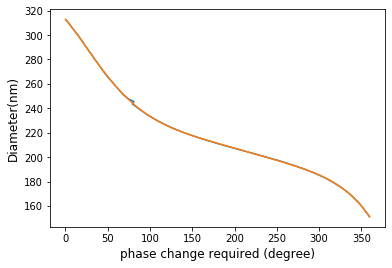

In [205]:
#ID,D,a,phase
data = pd.read_csv (r'phase.csv').to_numpy()
n_start = 220
n_end = 320
ID = data[n_start:n_end,0]
D = data[n_start:n_end,1]
a = data[n_start:n_end,2]
phase = data[n_start:n_end,3]

# find a 2pi or 360 degree range
a=12
b=len(phase)-6

xph=phase[a:b+1]+180
yD=D[a:b+1]
z7 = np.polyfit(xph, yD, 7)
p7 = np.poly1d(z)
# p30 = np.poly1d(np.polyfit(x, y, 30))
phase_test=np.linspace(0,360,100)

# give diameter for given phase change
D_test = p7(phase_test)

plt.plot(xph,yD)
plt.plot(phase_test,D_test)
plt.xlabel('phase change required (degree)',fontsize='large')
plt.ylabel('Diameter(nm)',fontsize='large')


In [206]:
# give the diemeter of post for given d_lc

def phase_map(d_lc):
    
    global wl
    global f
    
    # path length difference
    d_p=np.sqrt(f**2+d_lc**2)-f
    #     del_phase required  ?
    dpr=360-np.remainder(d_p, wl)/wl*360 
    D=p7(dpr) 
    
    return D
    
# def build_cylinder(x,y,r,h):
#     global order
#     print('With Cylinder ')
#     print('     .Reset')
#     print('     .Name "cylinder'+str(order)+'"')
#     print('     .Component "component1"')
#     print('     .Material "Silicon (loss free)"')
#     print('     .OuterRadius "'+str(r)+'"')
#     print('     .InnerRadius "0"')
#     print('     .Axis "z"')
#     print('     .Zrange "0", "'+str(h)+'"')
#     print('     .Xcenter "'+str(x)+'"')
#     print('     .Ycenter "'+str(y)+'"')
#     print('     .Segments "0"')
#     print('     .Create')
#     print('End With')
#     order=order+1


def build_cylinder(x,y,r,h):
    global order
    global string_result
    s1='With Cylinder '
    s1=s1+'\n'+'     .Reset'
    s1=s1+'\n'+'     .Name "cylinder'+str(order)+'"'
    s1=s1+'\n'+'     .Component "component1"'
    s1=s1+'\n'+'     .Material "Silicon (loss free)"'
    s1=s1+'\n'+'     .OuterRadius "'+str(r)+'"'
    s1=s1+'\n'+'     .InnerRadius "0"'
    s1=s1+'\n'+'     .Axis "z"'
    s1=s1+'\n'+'     .Zrange "0", "'+str(h)+'"'
    s1=s1+'\n'+'     .Xcenter "'+str(x)+'"'
    s1=s1+'\n'+'     .Ycenter "'+str(y)+'"'
    s1=s1+'\n'+'     .Segments "0"'
    s1=s1+'\n'+'     .Create'
    s1=s1+'\n'+'End With'
    order=order+1
    string_result=string_result+'\n'+s1



In [207]:
def cal_p():
    global a_lattice
    global lens_pitch_x
    global lens_pitch_y
    global x_lens_edge
    global y_lens_edge
    global naxlp
    global naylp
    
    naxlp=int(lens_pitch_x/a_lattice)
    if (naxlp%2==0):
        naxlp-=1
    x_lens_edge = (lens_pitch_x-naxlp*a_lattice)/2
    
    naylp=int(lens_pitch_y/a_lattice)
    if (naylp%2==0):
        naylp-=1
    y_lens_edge = (lens_pitch_y-naylp*a_lattice)/2
    

In [208]:
def build_lens(x_lc=0,y_lc=0):
    global lens_pitch_x
    global lens_pitch_y
    global d_lc_max
    global H_post
    global x_lens_edge
    global y_lens_edge
    global naxlp
    global naylp
#     1. build center part

# lens_pitch_x?

#   if full with center lattice
    x_lc_L=lens_pitch_x/2
    y_lc_L=lens_pitch_y/2
    
    for j in range(0,naylp):
        for i in range(0,naxlp):
            x_L=(i+0.5) * a_lattice+x_lens_edge
            y_L=(j+0.5) * a_lattice+y_lens_edge

            d_lc=np.sqrt( (x_L-x_lc_L)**2 + (y_L-y_lc_L)**2 ) 
            if (d_lc <= d_lc_max):
                D=phase_map(d_lc)
                x_block_center=x_L-x_lc_L+x_lc
                y_block_center=y_L-y_lc_L+y_lc
                build_cylinder(x_block_center,y_block_center,D/2,H_post)



In [209]:
# def build_lens_array(num_x,num_y,pitch,focal_length):
# 
def build_lens_array():
    global X_lens_num
    global Y_lens_num
    global lens_pitch_x
    global lens_pitch_y
    global string_result
    string_result=''
    cal_p()
    
    for j in range(0,Y_lens_num):
        for i in range(0,X_lens_num):
            x_lc=(i+0.5) * lens_pitch_x
            y_lc=(j+0.5) * lens_pitch_y
            build_lens(x_lc,y_lc) 
#     df = pd.DataFrame([string_result])
#     df.to_clipboard(index=False,header=False)
    text_file = open("structure.txt", "w")
    n = text_file.write(string_result)
    text_file.close()


### build lens array

#### build_lens_array
    build_lens((x_lc,y_lc))
        build_blocks(post/dimer/trimer/quadramer)
            build_cylinder 

In [211]:
build_lens_array()

In [165]:
    
# build_cylinder(x,y,r,h,order=1)
# def build_block(x_block_center,y_block_center,num_post=1):
#     if (num_post==1):
#        single post block
        
        
#     gap=50
#     D1=150
#     D2=190
#     h_cyl=250
#     x1=str(x_center)+"-(D1/2+gap/2)"
#     y1=str(y_center)
#     x2=str(x_center)+"+D2/2+gap/2"
#     y2=str(y_center)
#     build_cylinder(x1,y1,"D1/2","h",order=order1)
#     build_cylinder(x2,y2,"D2/2","h",order=order2)
#     return order